# Predicting Restaurant Food Cost 


Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. 

But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. 
I am going to use my Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.


FEATURES are as follows--:

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

Importing or calling all necessary models

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# DataSet:
Loading / Cleaning / Formatting

In [118]:
#Loading datasets:
df=pd.read_excel('Data_Train.xlsx')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [119]:
dft=pd.read_excel('Data_Test.xlsx')
dft

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [120]:
#Including a column in both dataset source : train and test:
df["source"] = "train"
dft["source"] = "test"

In [121]:
#Concat both the datasets:
df1 = pd.concat([df,dft])

In [122]:
#Shape of te dataset inclusive of both train and test:
df1.shape

(16921, 10)

In [123]:
#First five rows
df1.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [124]:
#Last five rows:
df1.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,test
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,test
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,test
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,test
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes,NaN,test


In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
 9   source         16921 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [126]:
#Removing Duplicated rows:
df1.duplicated().sum()

26

In [127]:
df1= df1.drop_duplicates()

In [128]:
#Shape of the dataset after Removing Duplicated rows:
df1.shape

(16895, 10)

# Checking missing values:

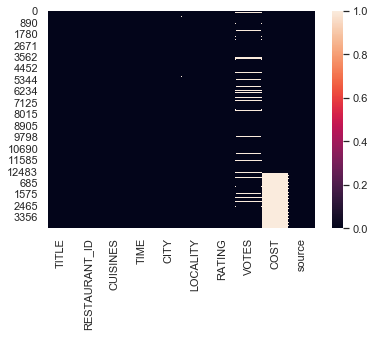

In [129]:
sns.heatmap(df1.isnull())

The above both graph is here to show that if there are any null values in the above dataset, there are some of the white lines which represent that there are some missing values under city,locality,ratings,vote(Null Values).

There are some missing values in the cost also but these are the test data which have been added to the train data.

In order to get more clearity we have taken out the sum of the total Null Values down which is giving the exact amount of missing values . There are missing values present in city,locality,ratings,vote. 
Hence we will be removing it.

In [130]:
df1.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
source              0
dtype: int64

In [131]:
#combining City and locality and creating a seperate column as Location, after that we will remove the column city and locality:

df1['Location']=df1['CITY']+' '+df1['LOCALITY']
df1.drop(columns=['CITY','LOCALITY'])

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,source,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200.0,train,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500.0,train,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800.0,train,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800.0,train,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300.0,train,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),3.9,287 votes,NaN,test,New Delhi Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),4.3,469 votes,NaN,test,Bangalore HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),3.7,53 votes,NaN,test,Faridabad Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",-,NaN,NaN,test,Kochi Kochi


In [132]:
df1.dropna(subset=['Location'],inplace=True)

In [133]:
#Processing the correct names in location(column):
from fuzzywuzzy import process
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array

correct_names=['Bangalore','Thane','Hyderabad','Andheri','Delhi', 'Kerala',
'Chennai', 'Bandra','Mumbai', 'Telangana','Kochi', 'Noida', 'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad','Secunderabad' ]
name_match=match_names(df1.Location,correct_names)    

print(len(names_array))
df1['Location']=names_array

16747


In [134]:
df1.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train,Thane
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train,Chennai
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train,Chennai
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train,Bandra
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train,Mumbai


In [135]:
#Creating a seperate dataset for the cuisines:
cuisines=[]
for row in df1['CUISINES']:
    cuisines.append(list(row.split(',')))
df1['CUISINES']=cuisines

In [136]:
df1_cuisines=df1['CUISINES'].apply(lambda x: pd.Series(1, x))

In [137]:
df1_cuisines.head()

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Egyptian,African,Egyptian,Fish and Chips,Brazilian,South American,Mishti,Falafel,Cantonese,Hawaiian
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
#Creating a seperate dataset for the title of the retro:
title=[]
for row in df1['TITLE']:
    title.append(list(row.split(',')))
df1['TITLE']=title

In [139]:
df1_title=df1['TITLE'].apply(lambda x: pd.Series(1, x))

In [140]:
df1_title.head()

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
#nan value treatment in rating:
df1[df1['RATING'].isna()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
204,[BAKERY],15062,[Bakery],Not Available,Kochi,Marine Drive,NaN,NaN,200.0,train,Kochi
421,[CAFÉ],14127,"[Cafe, Fast Food]",Not Available,Hyderabad,Banjara Hills,NaN,NaN,350.0,train,Hyderabad
2035,[QUICK BITES],2776,"[Kerala, Arabian]",Not Available,Kochi,Kakkanad,NaN,NaN,NaN,test,Kochi
2758,[None],11301,"[Chinese, North Indian, South Indian]",Not Available,Kochi,Tripunithura,NaN,NaN,NaN,test,Kochi


In [142]:
df1["RATING"] = df1.groupby("CITY").RATING.transform(lambda x : x.fillna(x.mode()[0]))

In [143]:
#changing the dtype of the rating to float:
df1['RATING']=df1['RATING'].str.extract('(\d+)').astype(float)

In [144]:
#nan value treatment in votes:
df1.VOTES.fillna('0',inplace=True)

In [145]:
#changing the dtype of the votes to float:
df1['VOTES']=df['VOTES'].str.extract('(\d+)').astype(float)

In [146]:
df1.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
0,[CASUAL DINING],9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.0,49.0,1200.0,train,Thane
1,"[CASUAL DINING, BAR]",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.0,30.0,1500.0,train,Chennai
2,[CASUAL DINING],10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.0,221.0,800.0,train,Chennai
3,[QUICK BITES],6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.0,24.0,800.0,train,Bandra
4,[DESSERT PARLOR],15387,[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.0,165.0,300.0,train,Mumbai


# Dropping of the columns
Dropping the columns city, locality and cuisines which are of no use now.

In [147]:
df1.drop(columns='CITY',inplace=True)
df1.drop(columns='LOCALITY',inplace=True)
df1.drop(columns='CUISINES',inplace=True)

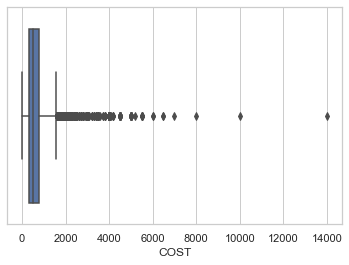

In [148]:
sns.boxplot(df1['COST'])

The above boxplot determines the minimum cost- less than 100 and the maximum cost-14000, also have a median cost by the total number of Restaurants which is around 500. We could also see that the there are outliers present the the data, but we will not be treating it as it is the cost of the restraurants which changes with respect to the different kind of restaurants.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe681c50310>,
      dtype=object)

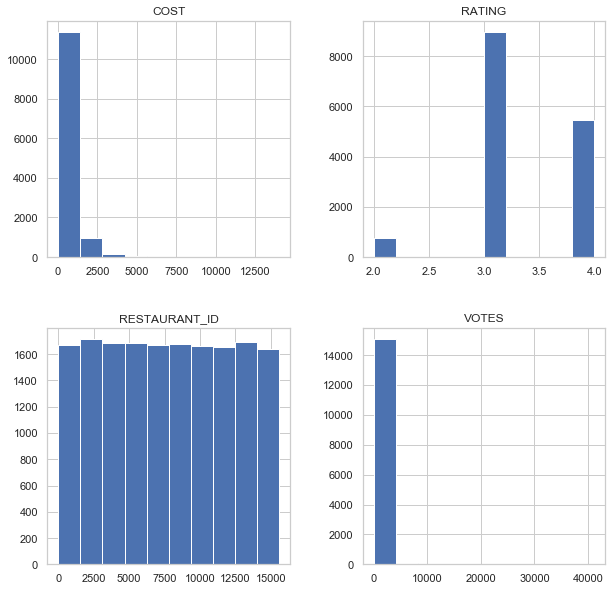

In [149]:
df1.hist(figsize=(10,10))

With the help of histogram we could find out the count of the Restaurants distribution under various variables, such as : Around 90% of the restaurants cost is below 1250, Most of the restaurants have the rating equivalent to 3 i.e. almost 7000+ , other than this almost 5000+ restro are with rating 4.

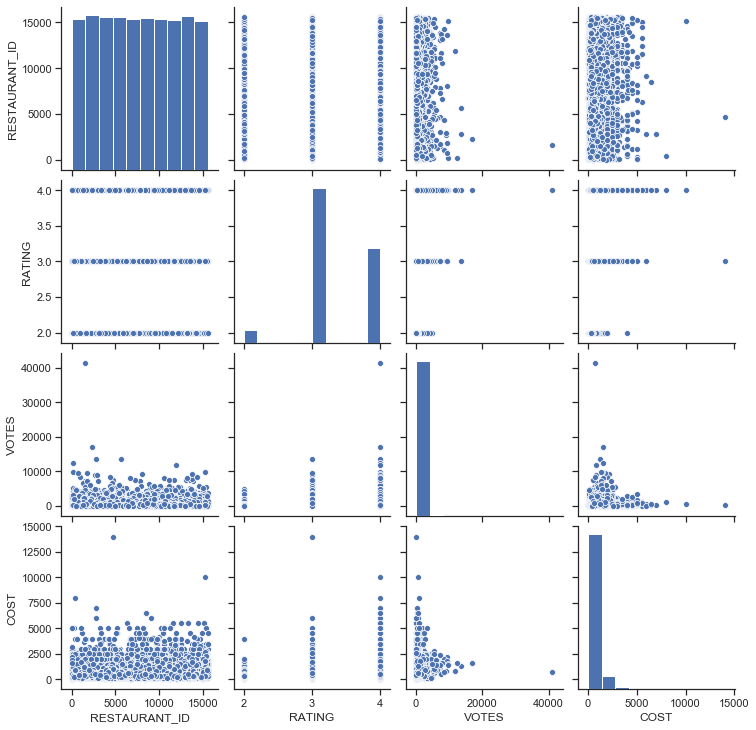

In [150]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df1)
plt.show()

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking all of them in to the consideration. 

But there is one field which is showing negative correlation with the targeted variable that is: Restaurant_ID, we wil remove this column.

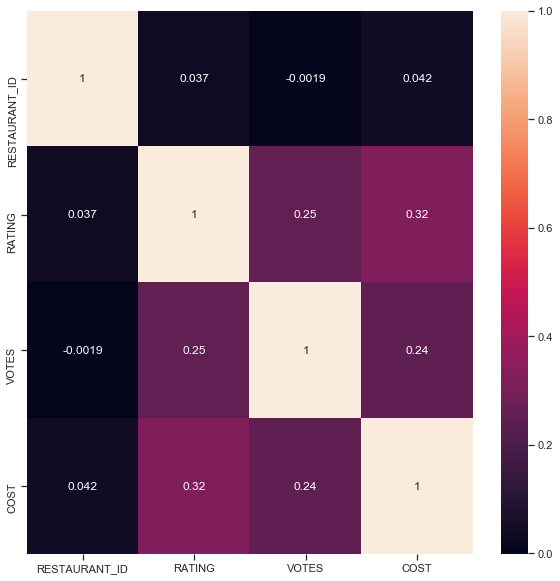

In [151]:
corr_hmap=df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

RESTAURANT_ID       AxesSubplot(0.125,0.125;0.168478x0.755)
RATING           AxesSubplot(0.327174,0.125;0.168478x0.755)
VOTES            AxesSubplot(0.529348,0.125;0.168478x0.755)
COST             AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

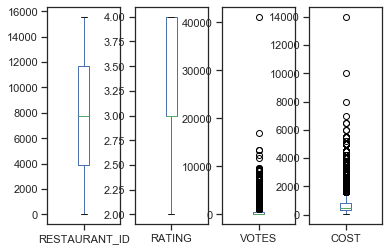

In [152]:
df1.plot(kind='box',subplots=True)

The plot box situated above and below are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as: Ratings, restro_id

The graph also shows some variables such as votes and cost , poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

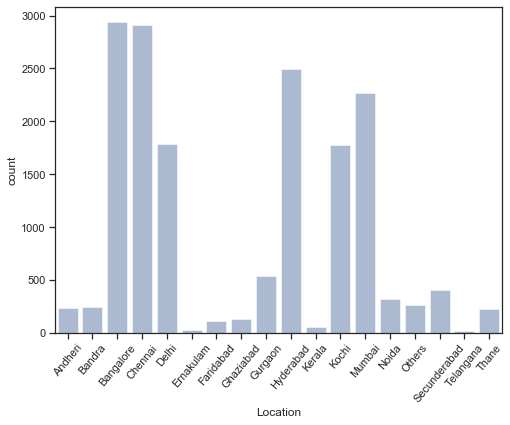

In [153]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df1['Location'].sort_values(), ax=ax, color='b', alpha=0.5)
plt.xticks(rotation=50)
plt.show()

From the above count plot we could see that the maximum Restaurants are present in Bangalore city which is followed by Chennai, Hyderabad ,Mumbai and Delhi which are all big metro city in India where as other locations are having less than 500 restaurants each. Bangalore is having more Restaurants which is around 2900 that means we have more variety and choices where we can eat food.

Text(0.5, 1.0, 'COST VS LOCATION')

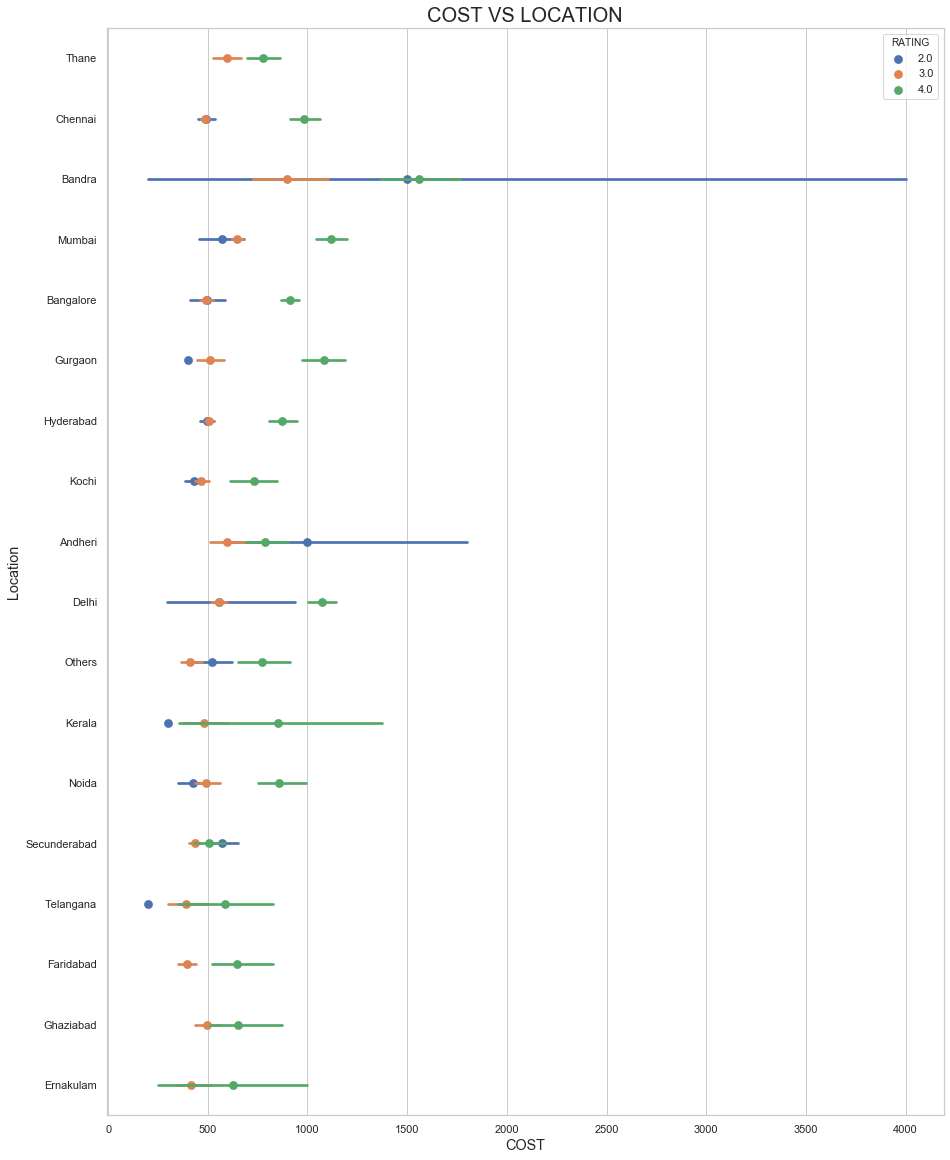

In [154]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='COST', y='Location', data=df1, hue='RATING',join=False)
plt.xlabel('COST',{'fontsize' : 'large'})
plt.ylabel('Location',{'fontsize':'large'})
plt.title("COST VS LOCATION",{'fontsize':20})

With respect to the above graph we could see the restaurants in every location determining the cost (so a person can put a budget and look for the same kind of cost pertaining restaurants )and ratings of the restaurants.

As per the graph I see Bandra has all level of restaurants costing range is 250 to 14000 but most of the restaurants are with rating 2. Kerala has the longest green line that means most of the 4 star rating restaurants are here and the cost is ranging from 400 to 1400 approx but they have very less choices as there are very few restaurants. It is determined that Gurgaon and Andheri restaurants are bit more expensive with respect to the ratings of the restaurants:

I can see that Hyderabad, Chennai and Bangalore have the maximum number of restaurants under which we could fine various variety and the cost price is below 1000 irrespective of the ratings. These places would be more suitable to go and eat food for me.

Now we are going to put all the dummies no. in the Location columns: and after that we will remove the column also from df1.

In [155]:
df1_City=pd.get_dummies(df1['Location'])
df1.drop(columns='Location',inplace=True)
df1_City.head()

,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Kerala,Kochi,Mumbai,Noida,Others,Secunderabad,Telangana,Thane
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [156]:
#Creation of the final dataset after concat df1,df1_City,df1_cuisines,df1_title:
df_final = pd.concat([df1,df1_City,df1_cuisines,df1_title], axis=1)
df_final.head()

,TITLE,RESTAURANT_ID,TIME,RATING,VOTES,COST,source,Andheri,Bandra,Bangalore,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,[CASUAL DINING],9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.0,49.0,1200.0,train,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[CASUAL DINING, BAR]",13198,6pm – 11pm (Mon-Sun),4.0,30.0,1500.0,train,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[CASUAL DINING],10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.0,221.0,800.0,train,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[QUICK BITES],6346,11:30am – 1am (Mon-Sun),4.0,24.0,800.0,train,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[DESSERT PARLOR],15387,11am – 1am (Mon-Sun),3.0,165.0,300.0,train,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing 3 more columns as they are of no use here: Title, Restaurant_id and Time

In [157]:
df_final.drop(columns='TITLE',inplace=True)
df_final.drop(columns='RESTAURANT_ID',inplace=True)

In [158]:
df_final.drop(columns='TIME',inplace=True)

In [159]:
df_final.head()

,RATING,VOTES,COST,source,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,3.0,49.0,1200.0,train,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,30.0,1500.0,train,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,221.0,800.0,train,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,24.0,800.0,train,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,165.0,300.0,train,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
#filling all the missing values:
df_final.fillna(0,inplace=True)

In [161]:
#Separating train and test data from the source column and after separation we will remove the source column also:
train_final = df_final[df_final.source=="train"]
test_final = df_final[df_final.source=="test"]

In [162]:
#Final shape:
train_final.shape

(12552, 276)

In [163]:
test_final.shape

(4195, 276)

Dropping source column from train_final and then Dropping source and cost column from test_final datasets:

In [164]:
train_final.drop(columns=["source"],inplace=True)
test_final.drop(columns=["source",'COST'],inplace=True)

# Assigning X and Y variables:

In [165]:
train_final.head()

,RATING,VOTES,COST,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,3.0,49.0,1200.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,30.0,1500.0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,221.0,800.0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,24.0,800.0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,165.0,300.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Changing Column:

Bringing COST column at the 1st column, inorder to ease of the calculation.

In [166]:
mid = train_final['COST']
train_final.drop(labels=['COST'], axis=1, inplace = True)
train_final.insert(0, 'COST', mid)
train_final.head()

,COST,RATING,VOTES,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1200.0,3.0,49.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1500.0,4.0,30.0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,800.0,3.0,221.0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,800.0,4.0,24.0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,300.0,3.0,165.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
train_final.describe()

,COST,RATING,VOTES,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
count,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,...,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.000000,12552.0
mean,656.297881,2.999841,377.756055,0.013544,0.015376,0.177263,0.176068,0.107234,0.001753,0.006533,...,0.002470,0.004222,0.004780,0.002231,0.000398,0.003585,0.000239,0.000478,0.000398,0.0
std,628.925085,1.102073,814.499653,0.115591,0.123048,0.381906,0.380893,0.309423,0.041830,0.080565,...,0.049637,0.064846,0.068976,0.047180,0.019955,0.059771,0.015459,0.021859,0.019955,0.0
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,300.000000,3.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,500.000000,3.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,800.000000,4.000000,406.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,14000.000000,4.000000,41186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


With the above description we can understand that the total count , mean or average value along with the standard deviation, minimum value , maximum value , 1st quartile, 2nd and 3rd quartile each columns, if we consider cost feature then the total count of the food restrro entries are 12552, average cost of the restro is 656.29 where the std is 628.92. We can also find that the min cost of a restro is 20 and max is 14000.

In [168]:
x=train_final.iloc[:,1:276]
x.shape
x

,RATING,VOTES,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,Ghaziabad,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,3.0,49.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,30.0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,221.0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,24.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,165.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,3.0,546.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12686,4.0,1214.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12687,4.0,608.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12688,3.0,32.0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
y=train_final.iloc[:,0:1]
y.shape
y

,COST
0,1200.0
1,1500.0
2,800.0
3,800.0
4,300.0
...,...
12685,500.0
12686,1800.0
12687,1300.0
12688,400.0


# PCA
(PRINCIPAL COMPONENT ANALYSIS)
As we can see in our final dataset that there are 275 columns presnt in order to transform the data without affecting any fields data lowering the columns number.
x was assigned with 274 columns now after transforming it has become 30 columns.


In [170]:
from sklearn.decomposition import PCA
pca=PCA(n_components=30)

In [171]:
x=pca.fit_transform(x)

In [172]:
x.shape

(12552, 30)

In [173]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-328.755905,-0.174666,-0.613632,-0.647291,0.479888,-0.091461,-0.217911,-0.053059,-0.113954,0.274497,...,0.228296,-0.213382,-0.094493,-0.020521,-0.120366,-0.151544,-0.032814,-0.285324,0.114993,0.093856
1,-347.755560,-1.217900,-0.488927,-0.511149,0.140136,0.575320,0.432163,0.134430,-0.534613,-0.032826,...,-0.236245,-0.303893,0.115460,-0.455271,-0.089798,0.472493,0.134659,-0.178857,-0.291859,-0.106897
2,-156.755966,-0.128834,-1.133274,0.670955,0.063824,0.642978,0.586267,0.255341,-0.162176,-0.158184,...,0.107428,0.328521,0.634506,-0.072335,0.082339,-0.056314,-0.054004,-0.124364,-0.013928,-0.121607
3,-353.755737,-1.062854,0.396305,0.650058,0.348005,-0.008715,-0.103163,-0.092603,0.293479,-0.117300,...,-0.143164,-0.057248,-0.014055,0.043173,0.047267,0.063038,0.100573,-0.278108,0.170237,0.056731
4,-212.756037,-0.113138,0.189465,-0.494667,-0.455454,0.105190,-0.252313,-0.480183,0.042243,-0.385761,...,-0.437649,-0.294591,0.299500,0.123352,0.015877,-0.477669,0.208739,-0.058704,-0.249541,-0.003711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12547,168.243845,0.122079,0.513984,0.810630,-0.304910,0.129805,-0.610866,0.456191,-0.194582,-0.062324,...,0.073133,-0.003145,-0.156200,0.010009,-0.049222,0.003298,-0.186729,-0.048781,-0.007748,0.018695
12548,836.244411,-0.741216,-0.425997,-0.469815,-0.179995,0.005088,-0.047932,-0.007239,-0.304415,-0.000019,...,0.278840,-0.449325,0.249018,-0.338276,-0.007792,0.458200,0.330479,-0.332574,-0.141599,0.037509
12549,230.244409,-0.958765,-0.237252,0.102105,-0.134855,0.048308,-0.135681,-0.663097,0.643836,-0.381622,...,-0.001166,-0.335034,0.360628,-0.110274,0.220021,-0.055956,-0.055744,0.159318,0.346610,-0.061645
12550,-345.755971,-0.194744,-1.181447,0.686571,0.064388,0.681741,0.630189,0.121709,-0.187398,-0.190040,...,-0.223408,0.037763,-0.193962,-0.062784,-0.090724,-0.110003,-0.022474,-0.093282,-0.000882,-0.203472


# MODEL SELECTION
Using different types of model in oder to reach at the optimum solution:

In [174]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

# LinearRegression

In [175]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42 is:  0.5151658548532381
r2_score corresponding to random state:  43 is:  0.5425657110820683
r2_score corresponding to random state:  44 is:  0.4618992915955663
r2_score corresponding to random state:  45 is:  0.5262246158735616
r2_score corresponding to random state:  46 is:  0.4833209268740213
r2_score corresponding to random state:  47 is:  0.5264168893387196
r2_score corresponding to random state:  48 is:  0.494898833910867
r2_score corresponding to random state:  49 is:  0.4530864463060047
r2_score corresponding to random state:  50 is:  0.46292193762633616
r2_score corresponding to random state:  51 is:  0.4660335115536164
r2_score corresponding to random state:  52 is:  0.5406781884793719
r2_score corresponding to random state:  53 is:  0.5045320764717385
r2_score corresponding to random state:  54 is:  0.5313700802580354
r2_score corresponding to random state:  55 is:  0.5423566189545119
r2_score corresponding to random state:  56 is: 

# KNeighborsRegressor

In [176]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 20}

In [177]:
knn= KNeighborsRegressor(n_neighbors=20)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.19623927442760336
r2_score corresponding to random state:  43 is:  0.19051116303597093
r2_score corresponding to random state:  44 is:  0.16153509820990408
r2_score corresponding to random state:  45 is:  0.1909433588728633
r2_score corresponding to random state:  46 is:  0.16945555046453475
r2_score corresponding to random state:  47 is:  0.19363244096229404
r2_score corresponding to random state:  48 is:  0.1659028595836155
r2_score corresponding to random state:  49 is:  0.14058718291466632
r2_score corresponding to random state:  50 is:  0.15852964508703005
r2_score corresponding to random state:  51 is:  0.17283388683599643
r2_score corresponding to random state:  52 is:  0.17879651748655334
r2_score corresponding to random state:  53 is:  0.1949833692698143
r2_score corresponding to random state:  54 is:  0.18881241876018307
r2_score corresponding to random state:  55 is:  0.17897531316277493
r2_score corresponding to random stat

# Lasso

In [178]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.01}

In [179]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.01)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.5151740475436504
r2_score corresponding to random state:  43 is:  0.5426037445538101
r2_score corresponding to random state:  44 is:  0.4619118698715823
r2_score corresponding to random state:  45 is:  0.5262287586675294
r2_score corresponding to random state:  46 is:  0.48334577490301944
r2_score corresponding to random state:  47 is:  0.5264199573909922
r2_score corresponding to random state:  48 is:  0.49488683818254775
r2_score corresponding to random state:  49 is:  0.45304032609978506
r2_score corresponding to random state:  50 is:  0.46292713490206594
r2_score corresponding to random state:  51 is:  0.4660404252643411
r2_score corresponding to random state:  52 is:  0.5406825807194755
r2_score corresponding to random state:  53 is:  0.5045349982216796
r2_score corresponding to random state:  54 is:  0.5313758499002539
r2_score corresponding to random state:  55 is:  0.5423562767820947
r2_score corresponding to random state:  56 

# RandomForestRegressor

In [180]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rr1=RandomForestRegressor(bootstrap=True,max_features='sqrt',min_samples_split=2,n_estimators=200)
rr1.fit(x_train, y_train)
rr1.score(x_train,y_train)

0.9511741748817185

In [181]:
pred=rr1.predict(x_test)
pred

array([ 614.25      ,  461.675     , 1691.        , ...,  255.75      ,
        309.27487441,  324.        ])

In [182]:
from math import sqrt
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred)))
print("R-squared: ", r2_score(y_test,pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  320.49327272650345
R-squared:  0.7050182322390219


# DecisionTreeRegressor

In [183]:
from sklearn.tree import DecisionTreeRegressor
depth =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [184]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


{'max_depth': 6}

In [185]:
y_train_pred =tree.predict(x_train)
y_test_pred =tree.predict(x_test)

In [186]:
from math import sqrt
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  362.102704420002
R-squared:  0.6780793911064047


In [187]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  399.9334317525955
R-squared:  0.5406615955117281


# Cross_val_score

In [188]:
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for R_forest Regressor ",cross_val_score(rr1,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst Regressor ",cross_val_score(rr1,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.512561900007614
Standard Deviation r2 score for Linear Regression:  0.03194184625331894


Mean r2 score for knn:  0.17561151883369588
Standard Deviation r2 score for knn:  0.017903139428932676


Mean r2 score for R_forest Regressor  0.6671861450296959
Standard Deviation r2 score for R_forst Regressor  0.03178280048892802


Mean r2 score for lasso  0.5125613038134108
Standard Deviation r2 score for lasso  0.03194002547165239


# Choosing a Model

Here after trying with various model for the above dataset, I am going to choose Random forest regressor as the best model for pridicting Restaurant Food Cost.

None of the other models showing good result or nearby to Randmon Forest Regressor, where rr1 RandomForestRegressor is predicting 95.11% accuracy score.

Hence I am going to predict the Restaurant Food Cost with Random Forest Regressor model.

# Saving the file:

In [189]:
from sklearn.externals import joblib

In [191]:
joblib.dump(rr1,'Project_14_Restaurant_Cost_Analysis.obj')

['Project_14_Restaurant_Cost_Analysis.obj']

In [192]:
#loading back the model:
model=joblib.load('Project_14_Restaurant_Cost_Analysis.obj')

In [193]:
#Pridicting x_test Randmon Forest Regressor, = rr1
rr1.predict(x_test)

array([ 614.25      ,  461.675     , 1691.        , ...,  255.75      ,
        309.27487441,  324.        ])